In [2]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import math
from bs4 import BeautifulSoup
from matplotlib.pyplot import figure
from IPython.display import clear_output

sns.set_style('darkgrid')

## Data Collection

In [3]:
# URLs of the data to be collected.
def numbeo_url_masterlist():
    return ['https://www.numbeo.com/quality-of-life/rankings.jsp',
            'https://www.numbeo.com/cost-of-living/rankings.jsp',
            'https://www.numbeo.com/property-investment/rankings.jsp',
            'https://www.numbeo.com/crime/rankings.jsp',
            'https://www.numbeo.com/health-care/rankings.jsp',
            'https://www.numbeo.com/pollution/rankings.jsp',
            'https://www.numbeo.com/traffic/rankings.jsp']

# Function used to scrape data from the list of Numbeo links.
def numbeo_data_scrape():
    for URL in numbeo_url_masterlist():
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, 'html.parser')


        # Parse webscrape data
        results = soup.find(id='t2')
        temp = len(results.find_all(class_='cityOrCountryInIndicesTable'))

        # Parse feature names from webscrape
        temp_result = soup.find_all('th')
        features = [temp_result[x].text for x in range(len(temp_result))][1:]
        feature_len = len(features)

        # Parses city data from webscrape
        test = results.find_all('td')
        parse_city_data = []
        for x in range(temp):
            for t in test[(1+(x*(feature_len+1))):((feature_len+1)+(x*(feature_len+1)))]:
                parse_city_data.append(t.text)

        # Stores data as DataFrame and saves to CSV
        temp_df = pd.DataFrame()
        for x in range(temp):
            temp_df = temp_df.append(pd.DataFrame([parse_city_data[(x*feature_len):(x*feature_len)+feature_len]], columns = features), ignore_index=True)
        temp_df.to_csv('data/'+re.findall('\/(.*?)\/', URL)[1]+'.csv')


def numbeo_data_retrieval():
    # Loads stored CSV data to DataFrame
    city_quality = pd.DataFrame()
    for URL in numbeo_url_masterlist():
        temp_df = pd.read_csv('data/'+re.findall('\/(.*?)\/', URL)[1]+'.csv')
        temp_df.drop(columns=['Unnamed: 0'], inplace=True)
        if city_quality.empty:
            city_quality = city_quality.append(temp_df)
        city_quality = city_quality.merge(temp_df, left_on='City', right_on='City', how='inner', suffixes=('','_delete'))
    city_quality.drop(list(city_quality.filter(regex='_delete$')), axis=1, inplace=True)
    return city_quality

In [4]:
city_quality = numbeo_data_retrieval()

## Data Visualization

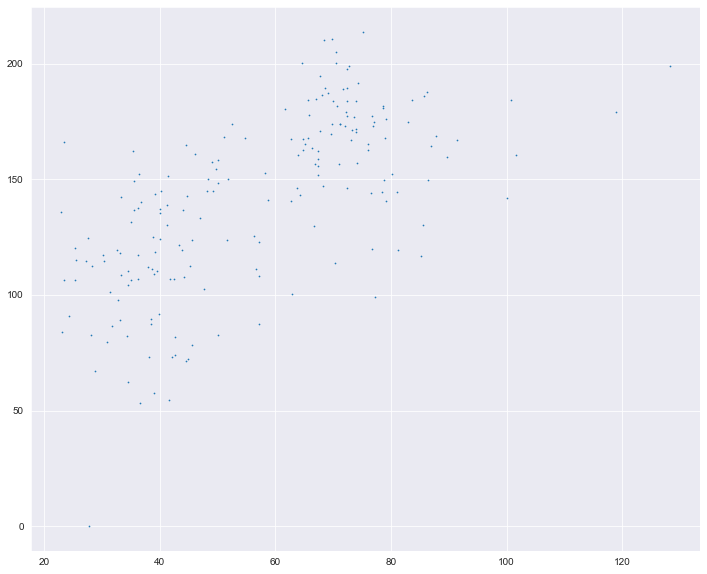

In [5]:
# Matplotlib Visualization
figure(num=None, figsize=(12, 10), edgecolor='k')
plt.plot(city_quality["Cost of Living Index"], city_quality["Quality of Life Index"],linestyle='', marker='o', markersize=0.7)

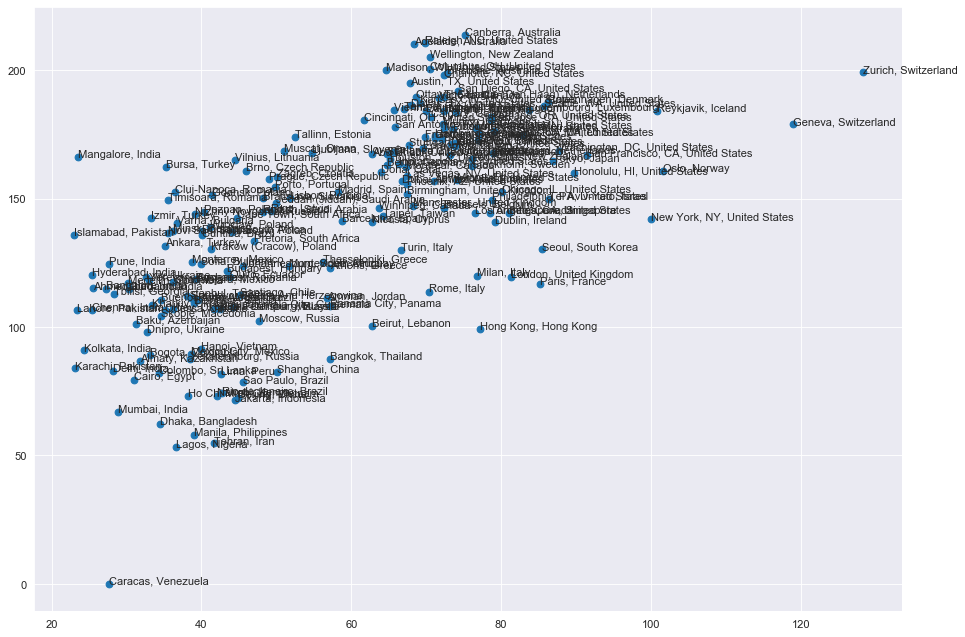

In [6]:
# Matplotlib Visualization
figure(num=None, figsize=(14, 10), dpi=80, edgecolor='k')
plt.scatter(city_quality["Cost of Living Index"], city_quality["Quality of Life Index"])

for i, txt in enumerate(city_quality['City']):
    plt.annotate(txt, (city_quality['Cost of Living Index'][i], city_quality['Quality of Life Index'][i]))

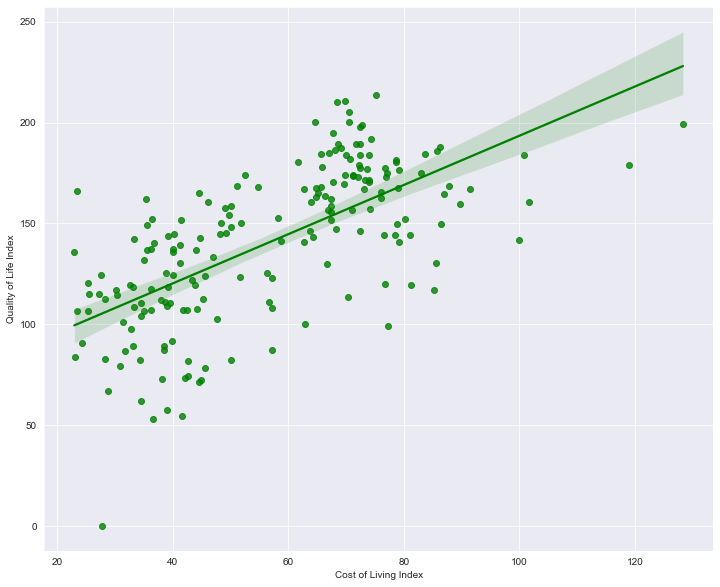

In [7]:
# Seaborn Visualization

f, ax = plt.subplots(figsize=(12, 10))
test = sns.regplot(x="Cost of Living Index", y="Quality of Life Index", data=city_quality, color="g", ax=ax)

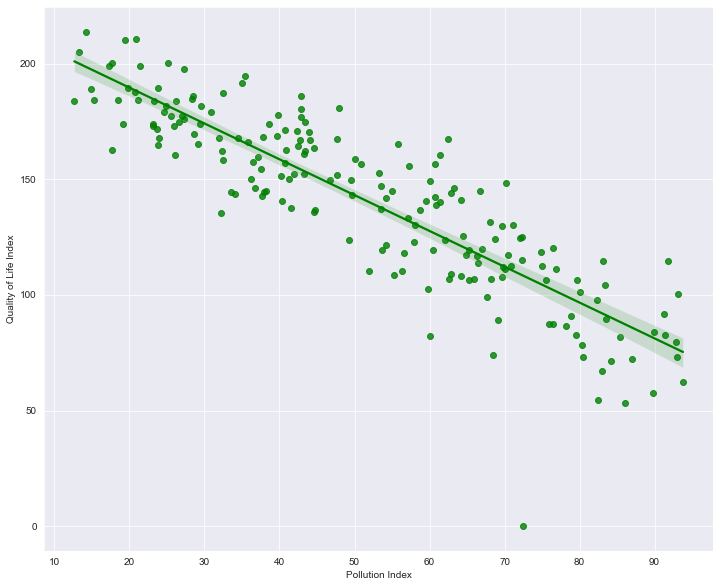

In [8]:
# Seaborn Visualization

f, ax = plt.subplots(figsize=(12, 10))
test = sns.regplot(x="Pollution Index", y="Quality of Life Index", data=city_quality, color="g", ax=ax)

In [9]:
list(city_quality.columns)

['City',
 'Quality of Life Index',
 'Purchasing Power Index',
 'Safety Index',
 'Health Care Index',
 'Cost of Living Index',
 'Property Price to Income Ratio',
 'Traffic Commute Time Index',
 'Pollution Index',
 'Climate Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index',
 'Price To Income Ratio',
 'Gross Rental Yield City Centre',
 'Gross Rental Yield Outside of Centre',
 'Price To Rent Ratio City Centre',
 'Price To Rent Ratio Outside Of City Centre',
 'Mortgage As A Percentage Of Income',
 'Affordability Index',
 'Crime Index',
 'Health CareExp. Index',
 'Exp Pollution Index',
 'Traffic Index',
 'Time Index(in minutes)',
 'Time Exp. Index',
 'Inefficiency Index',
 'CO2 Emission Index']

In [9]:
city_quality

,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,...,Mortgage As A Percentage Of Income,Affordability Index,Crime Index,Health CareExp. Index,Exp Pollution Index,Traffic Index,Time Index(in minutes),Time Exp. Index,Inefficiency Index,CO2 Emission Index
0,"Canberra, Australia",213.79,117.59,80.68,81.95,75.16,5.08,23.70,14.23,82.72,...,37.43,2.67,19.32,150.28,22.29,100.29,23.70,23.70,91.42,3864.08
1,"Raleigh, NC, United States",210.54,145.30,68.11,75.66,69.80,2.73,32.41,20.90,83.88,...,20.18,4.96,31.89,140.75,35.06,150.65,32.41,263.99,162.00,7968.35
2,"Adelaide, Australia",210.18,116.12,71.31,80.19,68.40,4.05,23.58,19.46,94.96,...,29.73,3.36,28.69,146.84,31.75,101.89,23.58,23.58,108.77,3972.33
3,"Wellington, New Zealand",205.06,106.71,71.39,74.84,70.47,6.06,27.68,13.30,97.68,...,47.75,2.09,28.61,136.31,29.14,92.96,27.68,42.24,74.46,2514.93
4,"Columbus, OH, United States",200.44,142.17,58.21,73.46,70.50,1.89,25.98,25.13,71.29,...,14.03,7.13,41.79,135.47,40.42,121.18,25.98,26.91,110.42,6321.26
5,"Madison, WI, United States",200.18,124.31,70.27,78.83,64.67,3.35,23.73,17.61,51.64,...,24.35,4.11,29.73,145.36,39.03,110.05,23.73,23.73,115.55,4997.85
6,"Zurich, Switzerland",199.15,126.90,83.17,73.52,128.29,8.23,34.36,17.29,81.48,...,47.97,2.08,16.83,137.89,27.77,106.51,34.36,471.66,95.62,1652.58
7,"Brisbane, Australia",198.88,119.03,66.22,82.10,72.80,5.49,40.64,21.43,98.07,...,39.98,2.50,33.78,150.88,35.66,180.43,40.64,1804.12,223.71,6782.17
8,"Charlotte, NC, United States",197.91,144.29,56.89,74.47,72.40,2.46,36.38,27.24,84.05,...,18.29,5.47,43.11,139.54,45.87,173.91,36.38,779.21,216.46,9006.76
9,"Austin, TX, United States",194.86,145.76,64.46,70.40,67.79,3.58,34.37,35.47,82.08,...,26.26,3.81,35.54,129.84,60.30,162.42,34.37,471.96,224.19,8346.62


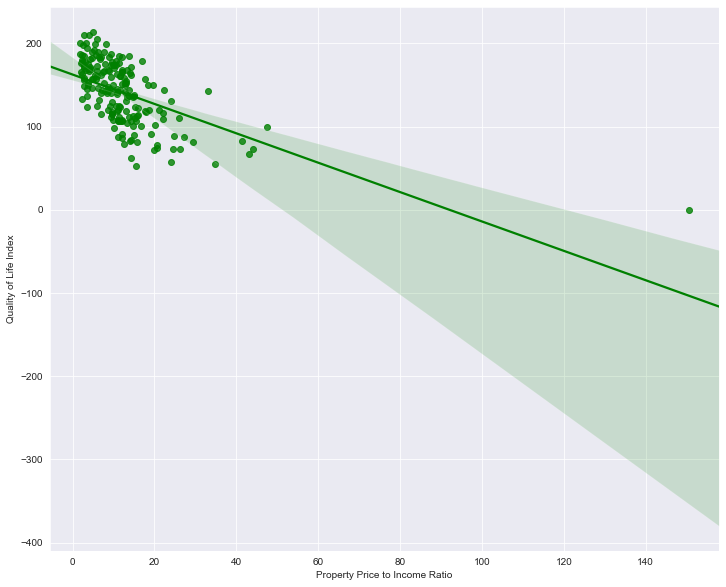

In [10]:
# Seaborn Visualization

f, ax = plt.subplots(figsize=(12, 10))
test = sns.regplot(x="Property Price to Income Ratio", y="Quality of Life Index", data=city_quality, color="g", ax=ax)

In [8]:
list(city_quality.columns)

['City',
 'Quality of Life Index',
 'Purchasing Power Index',
 'Safety Index',
 'Health Care Index',
 'Cost of Living Index',
 'Property Price to Income Ratio',
 'Traffic Commute Time Index',
 'Pollution Index',
 'Climate Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index',
 'Price To Income Ratio',
 'Gross Rental Yield City Centre',
 'Gross Rental Yield Outside of Centre',
 'Price To Rent Ratio City Centre',
 'Price To Rent Ratio Outside Of City Centre',
 'Mortgage As A Percentage Of Income',
 'Affordability Index',
 'Crime Index',
 'Health CareExp. Index',
 'Exp Pollution Index',
 'Traffic Index',
 'Time Index(in minutes)',
 'Time Exp. Index',
 'Inefficiency Index',
 'CO2 Emission Index']

In [10]:
city_quality

,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,...,Mortgage As A Percentage Of Income,Affordability Index,Crime Index,Health CareExp. Index,Exp Pollution Index,Traffic Index,Time Index(in minutes),Time Exp. Index,Inefficiency Index,CO2 Emission Index
0,"Canberra, Australia",213.79,117.59,80.68,81.95,75.16,5.08,23.70,14.23,82.72,...,37.43,2.67,19.32,150.28,22.29,100.29,23.70,23.70,91.42,3864.08
1,"Raleigh, NC, United States",210.54,145.30,68.11,75.66,69.80,2.73,32.41,20.90,83.88,...,20.18,4.96,31.89,140.75,35.06,150.65,32.41,263.99,162.00,7968.35
2,"Adelaide, Australia",210.18,116.12,71.31,80.19,68.40,4.05,23.58,19.46,94.96,...,29.73,3.36,28.69,146.84,31.75,101.89,23.58,23.58,108.77,3972.33
3,"Wellington, New Zealand",205.06,106.71,71.39,74.84,70.47,6.06,27.68,13.30,97.68,...,47.75,2.09,28.61,136.31,29.14,92.96,27.68,42.24,74.46,2514.93
4,"Columbus, OH, United States",200.44,142.17,58.21,73.46,70.50,1.89,25.98,25.13,71.29,...,14.03,7.13,41.79,135.47,40.42,121.18,25.98,26.91,110.42,6321.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,"Dhaka, Bangladesh",62.20,33.45,35.49,40.61,34.52,14.21,57.50,93.78,71.29,...,178.84,0.56,64.51,69.42,169.40,261.18,57.50,12931.84,323.95,5178.30
187,"Manila, Philippines",57.73,25.14,35.63,62.60,38.99,24.17,55.33,89.79,61.23,...,242.57,0.41,64.37,111.23,162.05,262.64,55.33,10721.58,283.31,7557.43
188,"Tehran, Iran",54.73,18.83,46.49,51.84,41.67,34.80,53.09,82.39,70.99,...,743.91,0.13,53.51,90.58,155.54,254.08,53.09,8717.31,270.03,8314.47
189,"Lagos, Nigeria",53.15,13.28,35.07,49.35,36.56,15.43,66.38,86.12,60.75,...,262.30,0.38,64.93,85.38,153.12,344.93,66.38,24883.39,577.78,9364.75


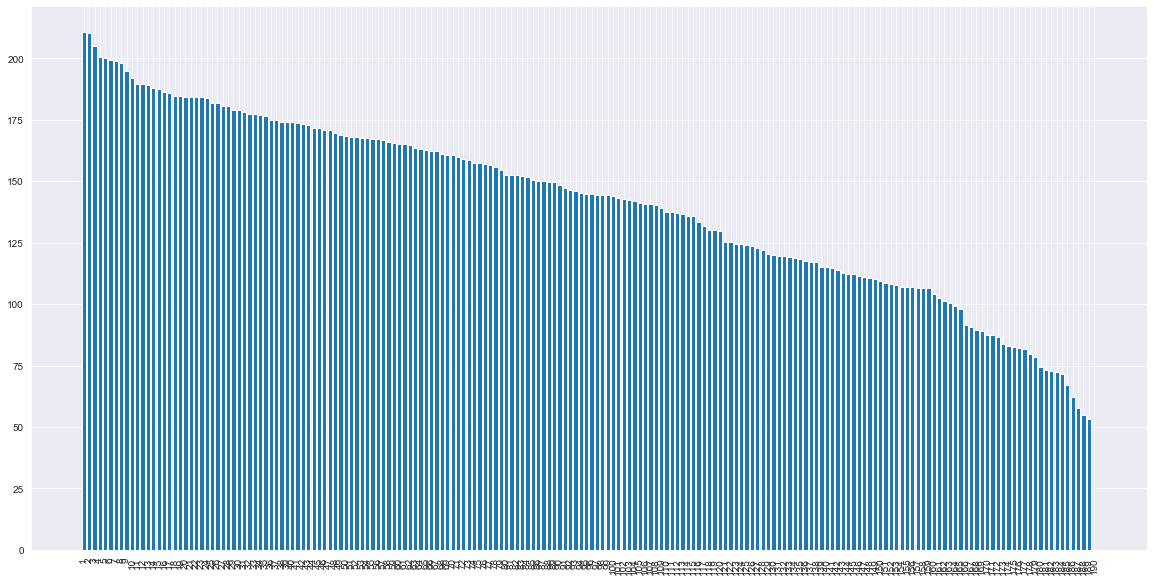

In [12]:
# Copied from web for code analysis

import matplotlib.pyplot as plt
 
# Get data
height = city_quality['Quality of Life Index'][1:].astype(float)

# Cities
bars = city_quality['Quality of Life Index'].keys()[1:]
y_pos = np.arange(len(bars))

# Set size
plt.figure(figsize=(20,10))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis & rotate them 90 degrees
plt.xticks(y_pos, bars, rotation=90)
 
# Show graphic
plt.show()